In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

In [3]:
# Convert the 'created_at' column from UNIX timestamp to a readable datetime format
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [4]:
# Calculate the approval rating as a percentage
df['approval_rating'] = (df['thumbs_up'] / (df['thumbs_up'] + df['thumbs_down'])) * 100

# Replace NaN values (e.g., when thumbs_up and thumbs_down are both 0) with 0
df['approval_rating'] = df['approval_rating'].fillna(0)
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,approval_rating
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...",0.0
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,100.0
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,100.0
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee...",100.0
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...,0.0
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...,0.0
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...,0.0
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...,0.0


In [ ]:
# unnamed 0: # of times that the recipe was reviewed

In [43]:
# Count the number of reviews for the specific recipe
specific_recipe = "Mamaw Emily’s Strawberry Cake"

# Ensure the recipe_name column exists and count the entries
if 'recipe_name' in df.columns:
    recipe_count = df[df['recipe_name'] == specific_recipe].shape[0]
    print(f"Number of reviews for '{specific_recipe}': {recipe_count}")
else:
    print("The 'recipe_name' column does not exist in the DataFrame.")

Number of reviews for 'Mamaw Emily’s Strawberry Cake': 113


### Duplicate Reviews

In [44]:
# Group by recipe_name and count duplicates in the text column
duplicates_per_recipe = (
    df[df.duplicated(subset=['recipe_name', 'text'], keep=False)]  # Filter duplicates
    .groupby('recipe_name')
    .size()
    .reset_index(name='duplicate_count')  # Rename the count column
)

# Display the counts of duplicates per recipe
print(duplicates_per_recipe)

                               recipe_name  duplicate_count
0                Amish Breakfast Casserole                6
1                     Bacon Macaroni Salad                2
2   Banana Bars with Cream Cheese Frosting                2
3                   Best Ever Banana Bread                5
4             Black Bean ‘n’ Pumpkin Chili                2
5                   Blueberry French Toast                2
6               Cheeseburger Paradise Soup                2
7                        Cheeseburger Soup              116
8                  Chicken Penne Casserole                2
9    Chocolate-Strawberry Celebration Cake                5
10                      Creamy White Chili              124
11                   Enchilada Casser-Ole!              157
12                 Favorite Chicken Potpie                8
13               Flavorful Chicken Fajitas                2
14                     Flavorful Pot Roast                2
15                  Garlic Beef Enchilad

In [45]:
# Drop duplicates based on recipe_name and text, keeping the first occurrence
df.drop_duplicates(subset=['recipe_name', 'text'], keep='first', inplace=True)
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,approval_rating,month,hour,sentiment,sentiment_encoded
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...",0.0,2022-10,0,positive,2
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,100.0,2022-10,1,positive,2
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,100.0,2022-09,22,positive,2
5,5,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2Do918IutExN0pWEOFMU4cbiT8v,u_BALTQJIvWtYr,nikhita,1,2022-08-24 15:19:11,0,3,1,5,518,amazing! my boyfriend loved it so much! going ...,75.0,2022-08,15,positive,2
6,6,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24hhcbywpsgGqG7yeDFH1IPZCb8,u_HuJVXMzQqJoI,Sandy1256,1,2022-02-05 19:20:05,0,11,0,5,833,Wow!!! This recipe is excellent as written!! ...,100.0,2022-02,19,positive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...,0.0,2021-06,10,positive,2
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...,0.0,2021-02,9,positive,2
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...,0.0,2021-06,10,positive,2
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...,0.0,2021-06,10,positive,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       18182 non-null  int64         
 1   recipe_number    18182 non-null  int64         
 2   recipe_code      18182 non-null  int64         
 3   recipe_name      18182 non-null  object        
 4   comment_id       18182 non-null  object        
 5   user_id          18182 non-null  object        
 6   user_name        18182 non-null  object        
 7   user_reputation  18182 non-null  int64         
 8   created_at       18182 non-null  datetime64[ns]
 9   reply_count      18182 non-null  int64         
 10  thumbs_up        18182 non-null  int64         
 11  thumbs_down      18182 non-null  int64         
 12  stars            18182 non-null  int64         
 13  best_score       18182 non-null  int64         
 14  text             18180 non-null  objec

In [6]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,approval_rating
count,18182.000000,18182.000000,18182.000000,18182.000000,18182,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,2021-06-14 22:41:25.783631872,0.014630,1.089264,0.549335,4.288802,153.162138,18.910213
min,0.000000,1.000000,386.000000,0.000000,2021-02-11 09:22:16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,2021-06-03 10:47:19,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000
50%,91.000000,33.000000,14600.000000,1.000000,2021-06-03 10:55:07,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000
75%,150.000000,64.000000,33121.000000,1.000000,2021-06-03 11:02:51,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000
max,724.000000,100.000000,191775.000000,520.000000,2022-10-14 14:00:35,3.000000,106.000000,126.000000,5.000000,946.000000,100.000000
std,116.747893,29.786647,23965.109637,10.014666,NaN,0.137974,4.201004,3.470124,1.544786,141.075316,36.917146


In [7]:
# Drop rows with null values
df = df.dropna()

# Optional: Print the number of rows to verify
print(f"Number of rows after dropping null values: {len(df)}")

Number of rows after dropping null values: 18180


In [ ]:
# 

In [8]:
df['stars'].value_counts()

stars
5    13827
0     1696
4     1655
3      490
1      280
2      232
Name: count, dtype: int64

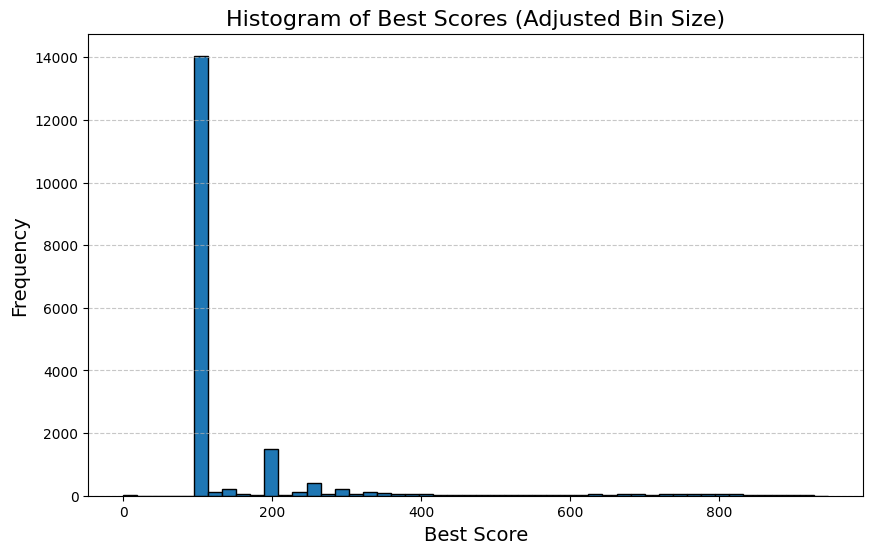

In [9]:
# Adjusted histogram for 'best_score' with more bins
plt.figure(figsize=(10, 6))
plt.hist(df['best_score'], bins=50, edgecolor='black')  # Increased bins to 50
plt.title('Histogram of Best Scores (Adjusted Bin Size)', fontsize=16)
plt.xlabel('Best Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Get the value counts for the 'recipe_name' column
df['recipe_name'].value_counts()

recipe_name
Cheeseburger Soup               724
Creamy White Chili              654
Best Ever Banana Bread          509
Enchilada Casser-Ole!           421
Basic Homemade Bread            397
                               ... 
Peanut Butter Cup Cheesecake     96
Blueberry French Toast           90
Caramel Heavenlies               86
Lime Chicken Tacos               86
Vegetarian Linguine              31
Name: count, Length: 100, dtype: int64

In [11]:
# Get the minimum and maximum dates
min_date = df['created_at'].min()
max_date = df['created_at'].max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

Minimum date: 2021-02-11 09:22:16
Maximum date: 2022-10-14 14:00:35


/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_31682/1885798520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['created_at'].dt.to_period('M')


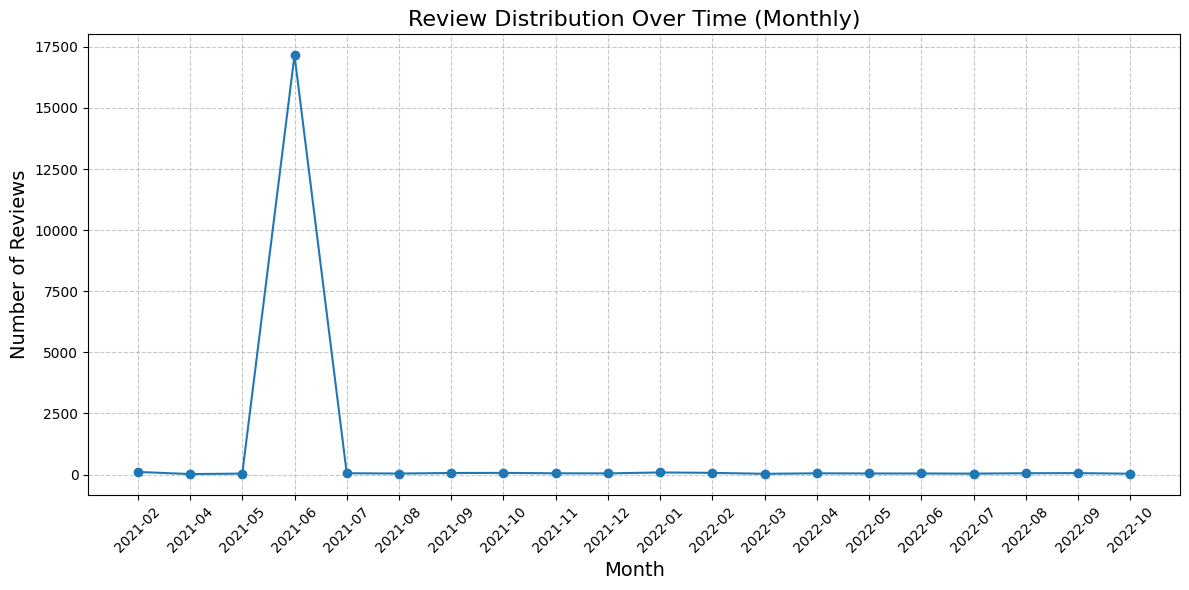

In [12]:
# Group data by month and count reviews
df['month'] = df['created_at'].dt.to_period('M')
monthly_review_distribution = df.groupby('month').size()

# Plot the monthly distribution
plt.figure(figsize=(12, 6))
plt.plot(monthly_review_distribution.index.astype(str), monthly_review_distribution.values, marker='o')
plt.title('Review Distribution Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
df['user_name'].value_counts()

user_name
2124arizona        28
JGa2595176         27
mjlouk             25
No_Time_To_Cook    25
justmbeth          23
                   ..
thuaners            1
MissGladysL         1
lamonli             1
Anni23554           1
cafritz             1
Name: count, Length: 13586, dtype: int64

In [14]:
min_rep = df['user_reputation'].min()
max_rep = df['user_reputation'].max()

print(f"Minimum Rep: {min_rep}")
print(f"Maximum Rep: {max_rep}")

Minimum Rep: 0
Maximum Rep: 520


In [15]:
df['user_reputation'].value_counts()

user_reputation
1      16934
10       657
20       285
0        151
30        74
50        18
40        15
80         9
90         7
60         6
100        5
510        3
110        3
70         3
130        2
140        2
160        1
300        1
220        1
170        1
520        1
150        1
Name: count, dtype: int64

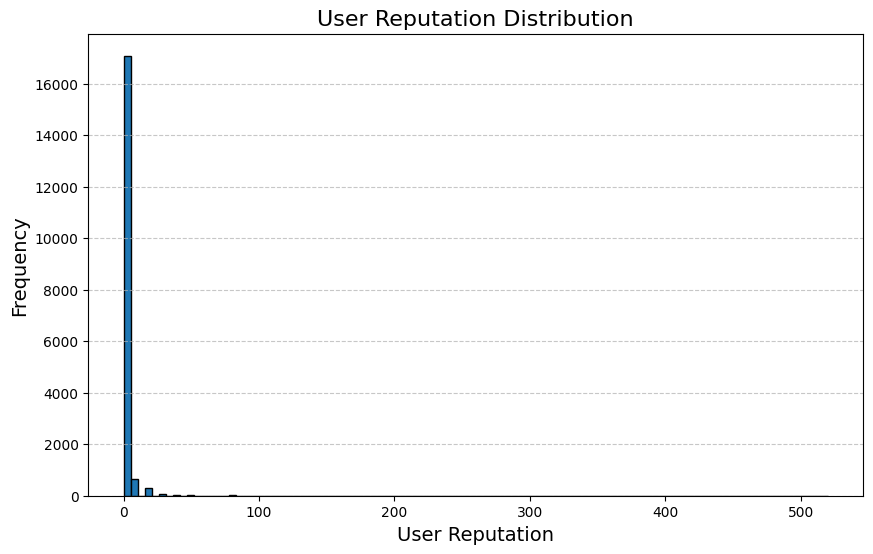

In [16]:
# Plot the histogram for 'user_reputation'
plt.figure(figsize=(10, 6))
plt.hist(df['user_reputation'], bins=100, edgecolor='black')
plt.title('User Reputation Distribution', fontsize=16)
plt.xlabel('User Reputation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Group by recipe_number and compute summary statistics
summary_stats = df.groupby('recipe_number').agg(
    total_comments=('comment_id', 'count'),       # Count of comments
    avg_user_reputation=('user_reputation', 'mean'),  # Average user reputation
    avg_reply_count=('reply_count', 'mean'),     # Average reply count
    avg_thumbs_up=('thumbs_up', 'mean'),         # Average thumbs up
    avg_thumbs_down=('thumbs_down', 'mean'),     # Average thumbs down
    avg_star_rating=('stars', 'mean'),           # Average star rating
    avg_best_score=('best_score', 'mean')        # Average best score
).reset_index()

# Display the results
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score
0,1,654,1.469419,0.015291,0.507645,0.221713,4.452599,130.729358
1,2,509,2.129666,0.009823,0.320236,0.129666,4.587426,126.222004
2,3,724,1.627072,0.022099,1.013812,0.674033,4.575967,136.412983
3,4,338,3.011834,0.008876,2.872781,0.970414,4.526627,191.952663
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269
5,6,394,1.380711,0.015228,0.923858,0.378173,4.512690,153.946701
6,7,368,1.877717,0.010870,0.785326,0.456522,4.608696,160.855978
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734
8,9,421,1.327791,0.004751,0.491686,0.190024,4.099762,123.456057
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988


In [18]:
# Add a ratio column for thumbs up to thumbs down
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['avg_thumbs_up'] / summary_stats['avg_thumbs_down']

# Handle cases where thumbs down is 0 to avoid division by zero
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['thumbs_up_to_down_ratio'].replace([float('inf'), -float('inf')], None).fillna(0)

# Display the updated summary table
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
0,1,654,1.469419,0.015291,0.507645,0.221713,4.452599,130.729358,2.289655
1,2,509,2.129666,0.009823,0.320236,0.129666,4.587426,126.222004,2.469697
2,3,724,1.627072,0.022099,1.013812,0.674033,4.575967,136.412983,1.504098
3,4,338,3.011834,0.008876,2.872781,0.970414,4.526627,191.952663,2.960366
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269,2.000000
5,6,394,1.380711,0.015228,0.923858,0.378173,4.512690,153.946701,2.442953
6,7,368,1.877717,0.010870,0.785326,0.456522,4.608696,160.855978,1.720238
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734,1.183206
8,9,421,1.327791,0.004751,0.491686,0.190024,4.099762,123.456057,2.587500
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988,1.766667


In [19]:
summary_stats.tail(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
90,91,86,1.325581,0.000000,0.127907,0.023256,3.302326,110.151163,5.500000
91,92,114,4.500000,0.008772,3.114035,1.692982,4.570175,219.684211,1.839378
92,93,110,2.590909,0.000000,0.718182,0.536364,4.327273,149.927273,1.338983
93,94,96,3.197917,0.020833,1.583333,1.197917,4.395833,169.958333,1.321739
94,95,96,3.052083,0.010417,0.812500,0.885417,4.291667,139.906250,0.917647
95,96,109,2.211009,0.000000,0.348624,0.256881,4.440367,143.623853,1.357143
96,97,86,2.430233,0.000000,0.372093,0.220930,3.976744,132.000000,1.684211
97,98,128,6.539062,0.007812,2.992188,1.562500,4.390625,224.265625,1.915000
98,99,112,4.017857,0.000000,1.258929,0.535714,4.258929,188.821429,2.350000
99,100,119,3.336134,0.033613,1.554622,0.789916,4.369748,208.865546,1.968085


In [20]:
df['recipe_number'].value_counts()

recipe_number
3     724
1     654
2     509
9     421
13    397
     ... 
56     96
72     90
91     86
97     86
61     31
Name: count, Length: 100, dtype: int64

In [21]:
top_recipes = df.groupby(['recipe_number', 'recipe_name']).size().reset_index(name='total_comments')
top10 = top_recipes.sort_values(by='recipe_number', ascending=True)

top10.head(10)

,recipe_number,recipe_name,total_comments
0,1,Creamy White Chili,654
1,2,Best Ever Banana Bread,509
2,3,Cheeseburger Soup,724
3,4,Amish Breakfast Casserole,338
4,5,Pumpkin Spice Cupcakes with Cream Cheese Frosting,197
5,6,Favorite Chicken Potpie,394
6,7,Flavorful Chicken Fajitas,368
7,8,Apple Pie,241
8,9,Enchilada Casser-Ole!,421
9,10,Zucchini Pizza Casserole,332


In [22]:
# Trying to understand the number of stars for each recipe number, what are the weights for each rating number
# Recipe 3 has more 5 stars and less 0 stars than recipe 1.... why is that? - Is the ratio different between 1,2 and 3

star_counts = df.groupby(['recipe_number', 'stars']).size().unstack(fill_value=0)
print("\nStar Counts for Each Recipe:")
print(star_counts)


Star Counts for Each Recipe:
stars           0  1  2   3   4    5
recipe_number                       
1              53  6  2  10  43  540
2              24  7  7   8  25  438
3              25  9  8  22  78  582
4              15  4  4  11  35  269
5              16  2  0   5   8  166
...            .. .. ..  ..  ..  ...
96              7  1  0   3  16   82
97             10  3  3   3  11   56
98              8  3  0   8  10   99
99              6  4  2   5  21   74
100             6  2  4   6  13   88

[100 rows x 6 columns]


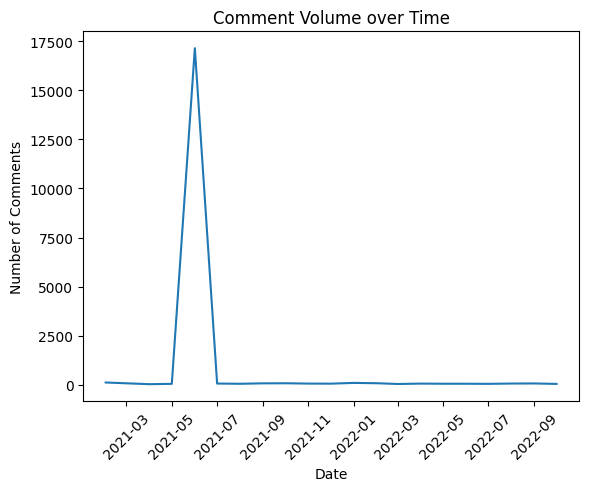

In [23]:
comment_volume = df.groupby(df['created_at'].dt.to_period('M')).size().reset_index(name='comment_count')

plt.plot(comment_volume['created_at'].dt.to_timestamp(), comment_volume['comment_count'])
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of Comments')
plt.title('Comment Volume over Time')
plt.show()

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_31682/3303072277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['created_at'].dt.hour


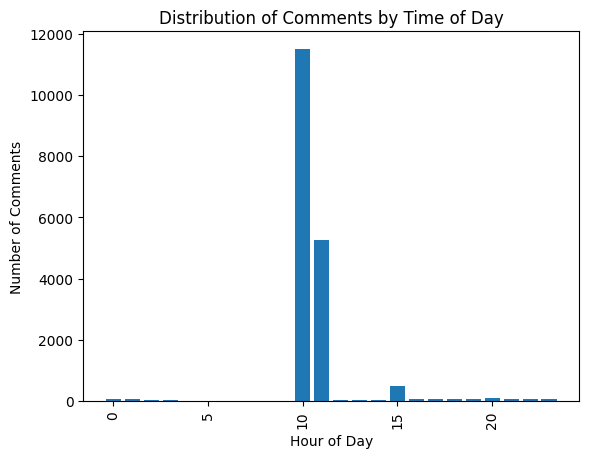

In [24]:
# Majority of comments occur at 10/11 am (Before lunch time to prep the recipe???)

df['hour'] = df['created_at'].dt.hour

hourly_distribution = df.groupby('hour').size().reset_index(name='comment_count')

#Plot the distribution
plt.bar(hourly_distribution['hour'], hourly_distribution['comment_count'])
plt.xlabel('Hour of Day')
plt.xticks(rotation=90)
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments by Time of Day')
plt.show()

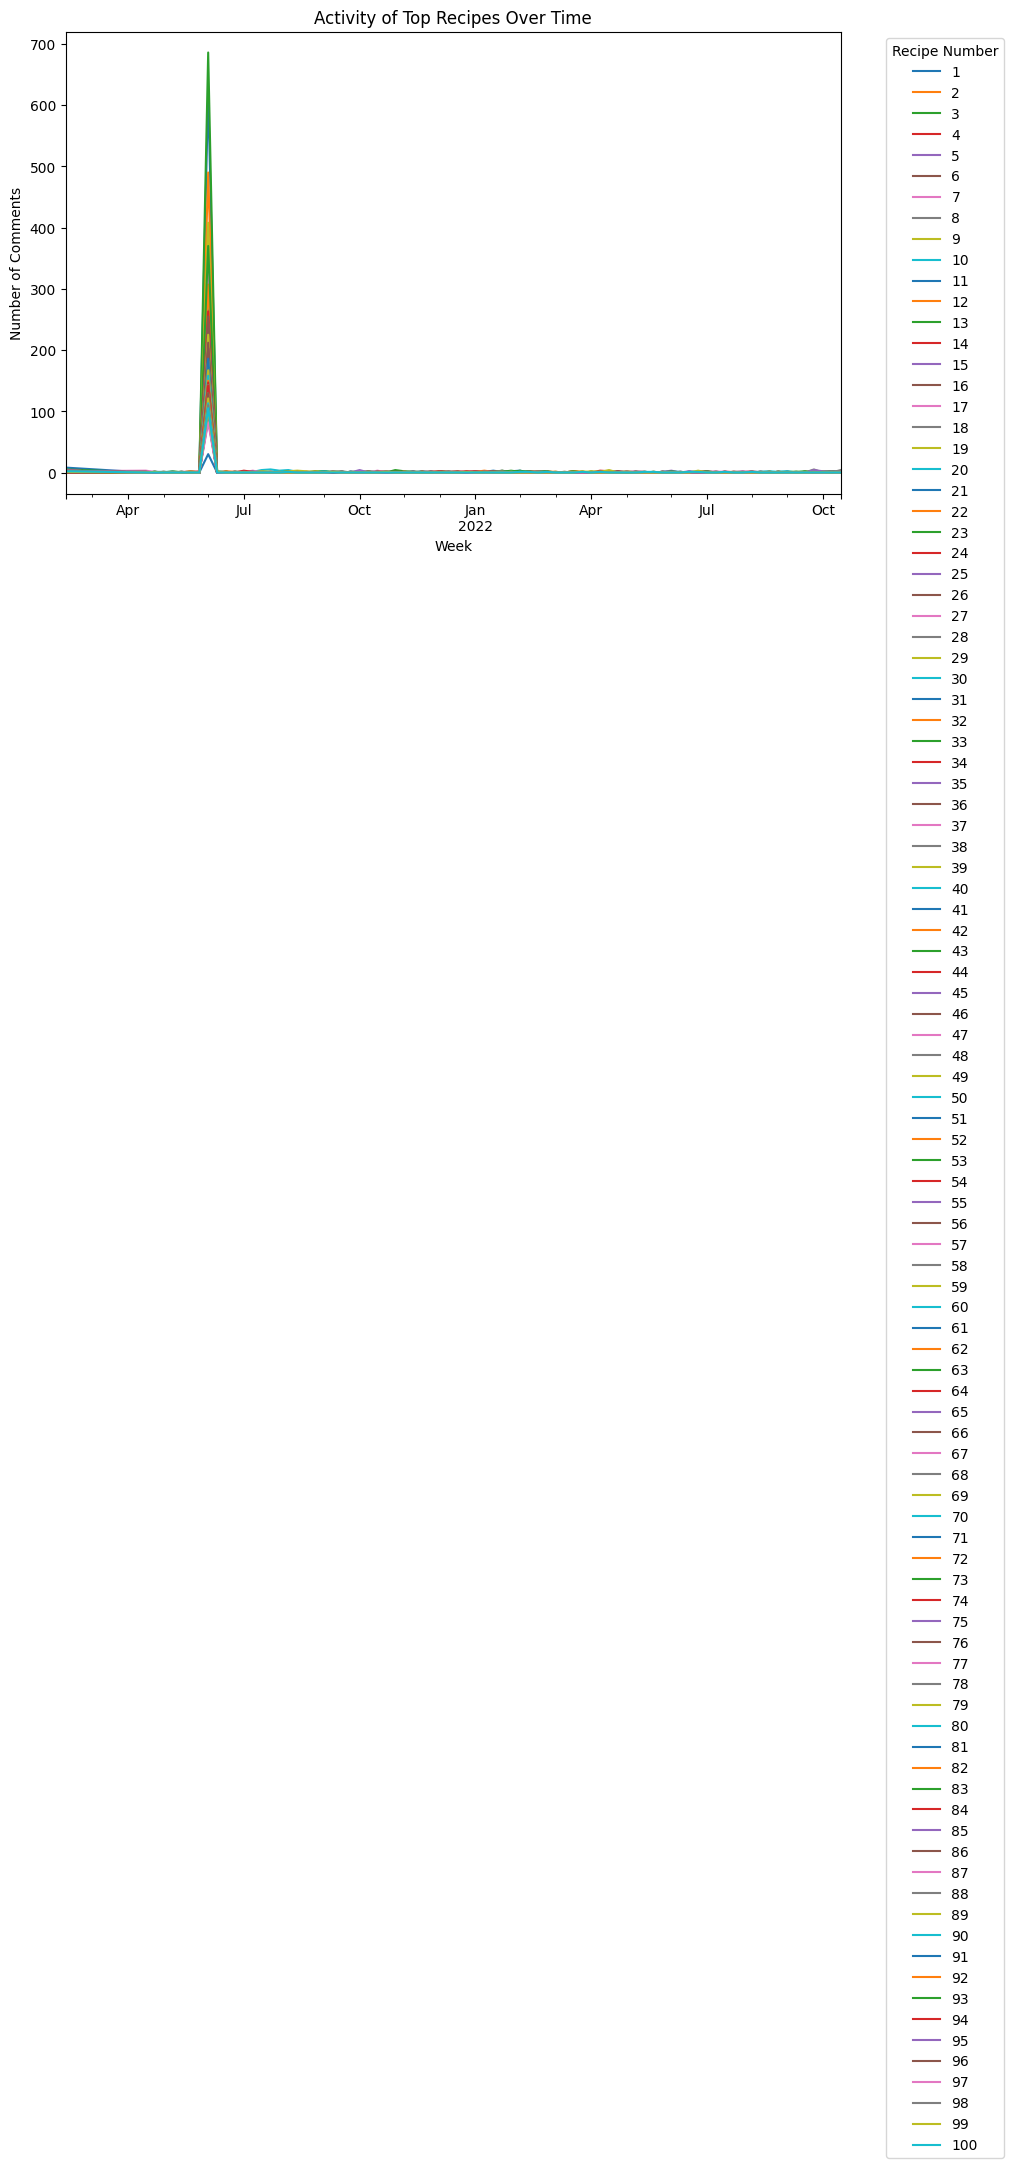

In [25]:
# All the comments were happening in June

# Group by recipe_number and week
recipe_timeline = df.groupby([df['created_at'].dt.to_period('W'), 'recipe_number']).size().unstack(fill_value=0)

# Plot the activity of top recipes
recipe_timeline.plot(figsize=(10, 6))
plt.xlabel('Week')
plt.ylabel('Number of Comments')
plt.title('Activity of Top Recipes Over Time')
plt.legend(title='Recipe Number', bbox_to_anchor=(1.05, 1))
plt.show()

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_31682/1300973590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


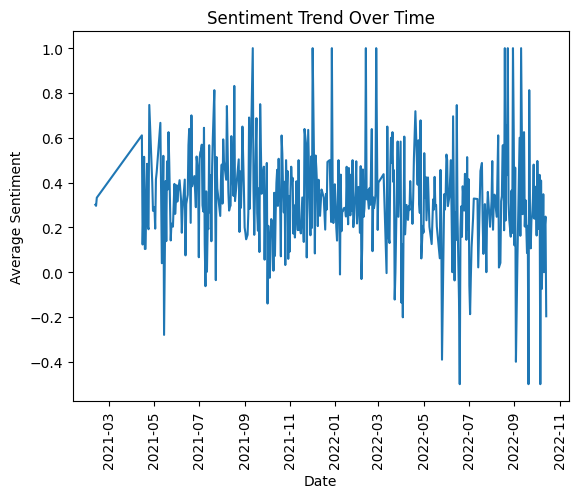

In [26]:
from textblob import TextBlob

# Calculate sentiment polarity for each comment
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Group by day and calculate average sentiment
sentiment_trend = df.groupby(df['created_at'].dt.to_period('D'))['sentiment'].mean().reset_index()

# Plot sentiment over time
plt.plot(sentiment_trend['created_at'].dt.to_timestamp(), sentiment_trend['sentiment'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Sentiment')
plt.title('Sentiment Trend Over Time')
plt.show()

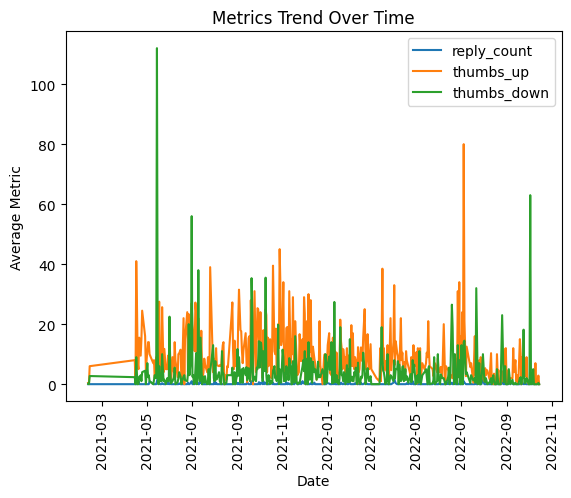

In [27]:
# Group by day and calculate averages
metrics_trend = df.groupby(df['created_at'].dt.to_period('D'))[['reply_count', 'thumbs_up', 'thumbs_down']].mean().reset_index()

# Plot each metric over time
for metric in ['reply_count', 'thumbs_up', 'thumbs_down']:
    plt.plot(metrics_trend['created_at'].dt.to_timestamp(), metrics_trend[metric], label=metric)

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Metric')
plt.title('Metrics Trend Over Time')
plt.legend()
plt.show()

In [28]:
# Sort the dataset by 'thumbs_up' in descending order
top_thumbs_up_comments = df.sort_values(by='thumbs_up', ascending=False)

# Select relevant columns to display (including recipe_number and the full text comment)
top_comments = top_thumbs_up_comments[['recipe_number', 'text', 'thumbs_up']].head(30)

# Display the top comments with the highest thumbs up
top_comments.reset_index()

,index,recipe_number,text,thumbs_up
0,15852,81,"Good,easy recipe. For all u snarky bullies who...",106
1,14778,73,Fat Free Half and Half is not Half and Half. I...,80
2,13347,62,I enjoys these reviews. Rarely make the recipe...,79
3,16497,86,"I like the ingredients and portions, but this ...",76
4,16877,89,I remember a time long long ago lol..when my m...,76
5,4191,11,As with any recipe one tends to adjust to thei...,76
6,4473,12,I really liked this recipe and so did most of ...,73
7,1192,3,This looks delicious. If I want to make it in...,69
8,3433,9,I&#39;m always surprised when someone changes ...,68
9,17010,90,Made it for company tonight! I served it warm...,60


## Sentiment Analysis

Test Accuracy: 0.8655115511551155


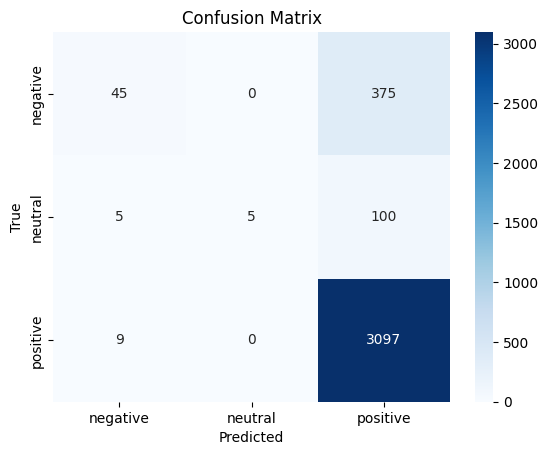

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.11      0.19       420
     neutral       1.00      0.05      0.09       110
    positive       0.87      1.00      0.93      3106

    accuracy                           0.87      3636
   macro avg       0.88      0.38      0.40      3636
weighted avg       0.86      0.87      0.82      3636



In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace with your actual dataset if needed)
df = df.dropna(subset=['text', 'stars', 'approval_rating'])  # Ensure no missing values
df = df[df['stars'].between(0, 5)]  # Ensure stars are within valid range

# Map stars to sentiment
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

df['sentiment'] = df['stars'].apply(map_star_to_sentiment)

# Encode sentiment labels as integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_encoded'] = df['sentiment'].map(label_mapping)

# Preprocess text, approval rating, and labels
texts = df['text'].astype(str).tolist()
approval_ratings = df['approval_rating'].tolist()
labels = df['sentiment_encoded'].tolist()

# Split the data into training and testing sets
X_train_text, X_test_text, X_train_rating, X_test_rating, y_train, y_test = train_test_split(
    texts, approval_ratings, labels, test_size=0.2, random_state=42
)

# Combine text and approval ratings for modeling
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use TF-IDF for text representation
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test_text).toarray()

# Normalize approval ratings and combine with TF-IDF features
X_train_rating = np.array(X_train_rating).reshape(-1, 1) / 100.0  # Normalize to 0-1 range
X_test_rating = np.array(X_test_rating).reshape(-1, 1) / 100.0
X_train = np.hstack((X_train_tfidf, X_train_rating))
X_test = np.hstack((X_test_tfidf, X_test_rating))

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = rf_classifier.score(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

### Integrating SMOTE to Sentiment Analysis

Classification Report:
              precision    recall  f1-score   support

    negative       0.51      0.21      0.29       420
     neutral       0.33      0.06      0.11       110
    positive       0.88      0.97      0.92      3106

    accuracy                           0.86      3636
   macro avg       0.57      0.41      0.44      3636
weighted avg       0.82      0.86      0.82      3636



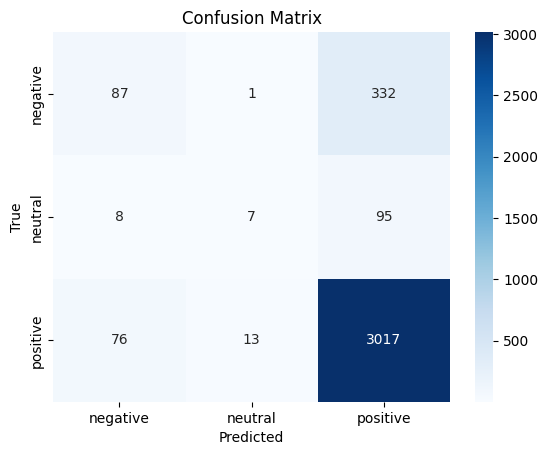

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Deep Learning Models

### Text classification model built using a Deep Neural Network (DNN) architecture with an Embedding Layer and a Global Average Pooling Layer.
- Predict star ratings of reviews based on text

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8360 - loss: 0.7992 - val_accuracy: 0.8392 - val_loss: 0.6070
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.8414 - loss: 0.5881 - val_accuracy: 0.8392 - val_loss: 0.5869
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.8396 - loss: 0.5767 - val_accuracy: 0.8392 - val_loss: 0.5586
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.8340 - loss: 0.5565 - val_accuracy: 0.8405 - val_loss: 0.5215
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.8452 - loss: 0.4963 - val_accuracy: 0.8399 - val_loss: 0.4976
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8441 - loss: 0.4782 - val_accuracy: 0.8392 - val_loss: 0.4881
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8461 - loss: 0.4581 - val_accuracy: 0.8386 - val_loss: 0.5169
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8520 - loss: 0.4428 - 

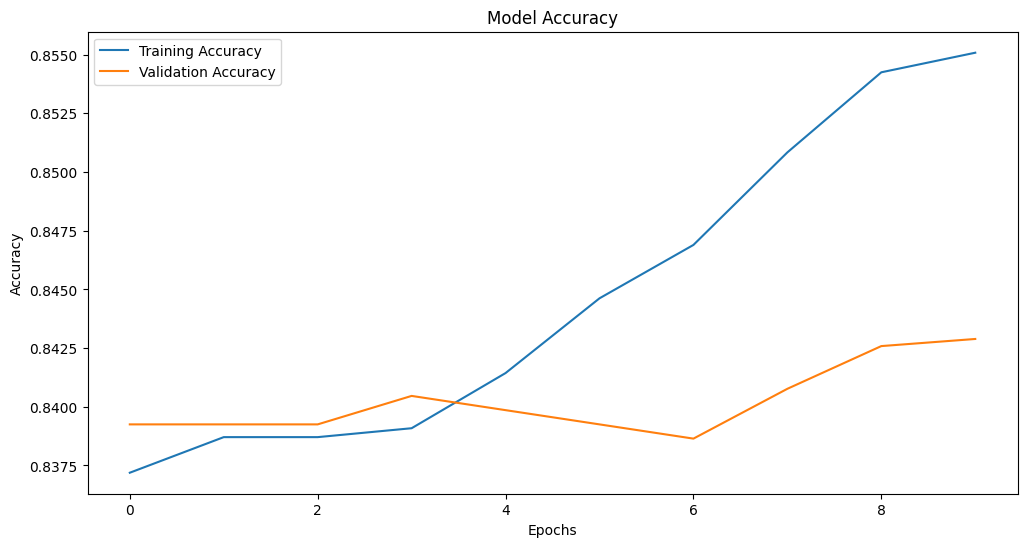

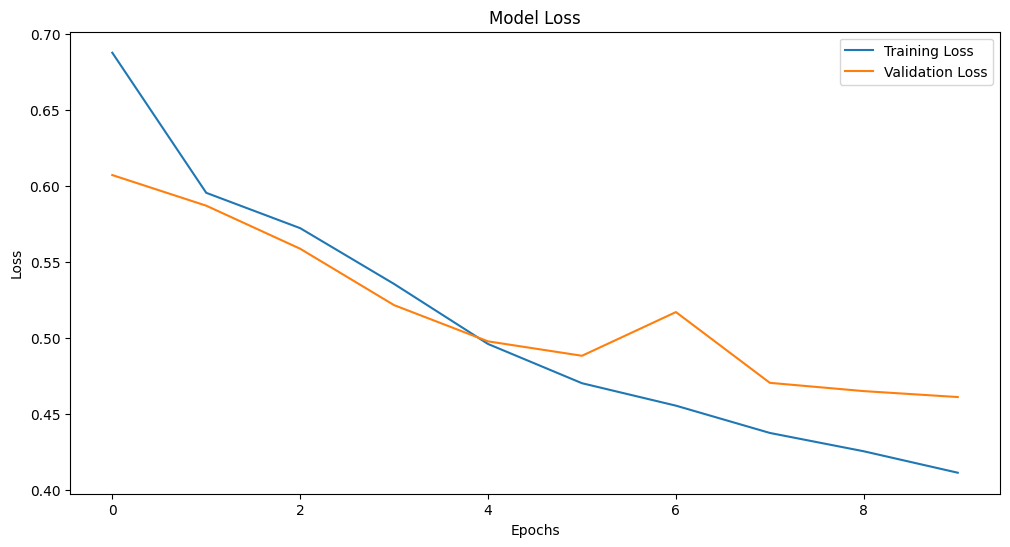

In [31]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Filter valid data
df = df.dropna(subset=['text', 'stars'])
df = df[df['stars'].between(1, 5)]  # Ensure stars values are between 1 and 5

# Preprocess the text data
texts = df['text'].astype(str)
labels = df['stars']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to 0-indexed (since stars are 1-5, subtract 1)
y_train = y_train - 1
y_test = y_test - 1

# Build the model
num_classes = 5

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class output
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Multi-class loss function
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_padded, y_train,  # Use original training data
    epochs=10,
    validation_data=(X_test_padded, y_test),  # Validation data
    batch_size=32
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy}")

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


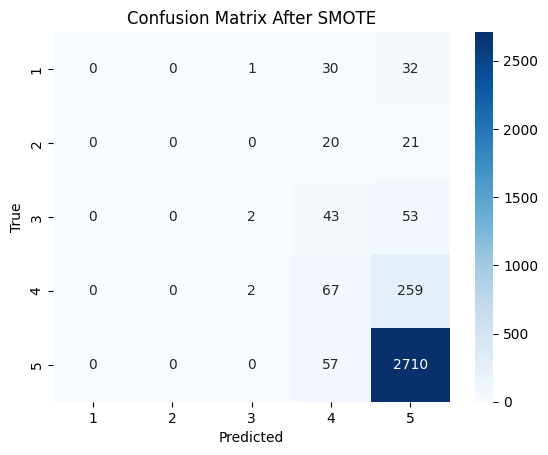

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        63
           2       0.00      0.00      0.00        41
           3       0.40      0.02      0.04        98
           4       0.31      0.20      0.25       328
           5       0.88      0.98      0.93      2767

    accuracy                           0.84      3297
   macro avg       0.32      0.24      0.24      3297
weighted avg       0.78      0.84      0.80      3297



/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(X_test_padded).argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix After SMOTE')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(1, 6)]))

## LSTM Model

Epoch 1/10


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


413/413 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.8251 - loss: 0.6891 - val_accuracy: 0.8392 - val_loss: 0.6155
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.8348 - loss: 0.6118 - val_accuracy: 0.8392 - val_loss: 0.6229
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.9083 - loss: 0.3193 - val_accuracy: 0.8392 - val_loss: 0.6484
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.9169 - loss: 0.2711 - val_accuracy: 0.8392 - val_loss: 0.6427
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.9229 - loss: 0.2548 - val_accuracy: 0.8392 - val_loss: 0.6107
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.9379 - loss: 0.2002 - val_accuracy: 0.8392 - val_loss: 0.6214
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.9385 - loss: 0.2005 - val_accuracy: 0.8392 - val_loss: 0.6134
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - accuracy: 0.9443 - loss: 0.1837 - val_accurac

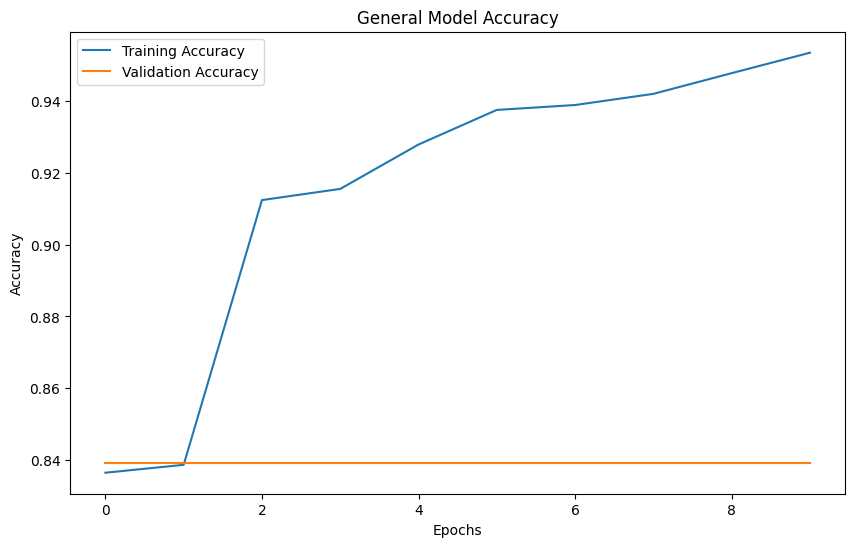

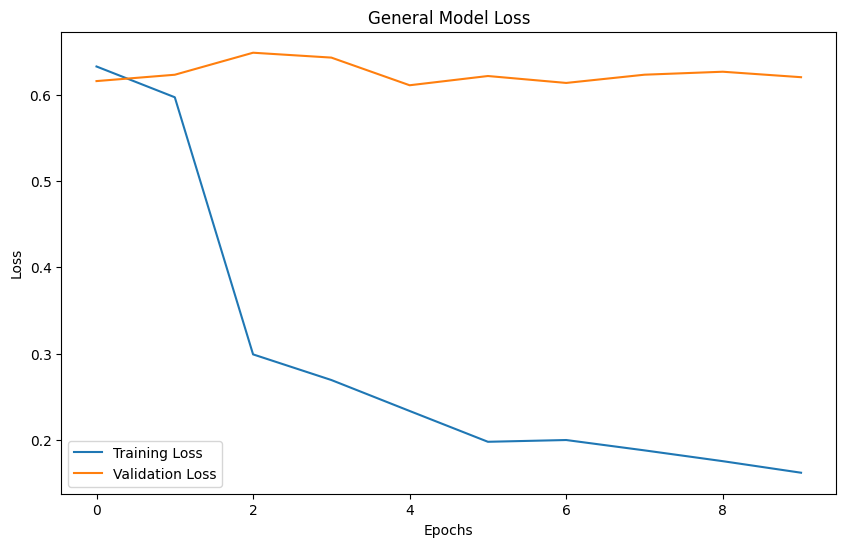

104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
General Model Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        63
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        98
           4       0.00      0.00      0.00       328
           5       0.84      1.00      0.91      2767

    accuracy                           0.84      3297
   macro avg       0.17      0.20      0.18      3297
weighted avg       0.70      0.84      0.77      3297



/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

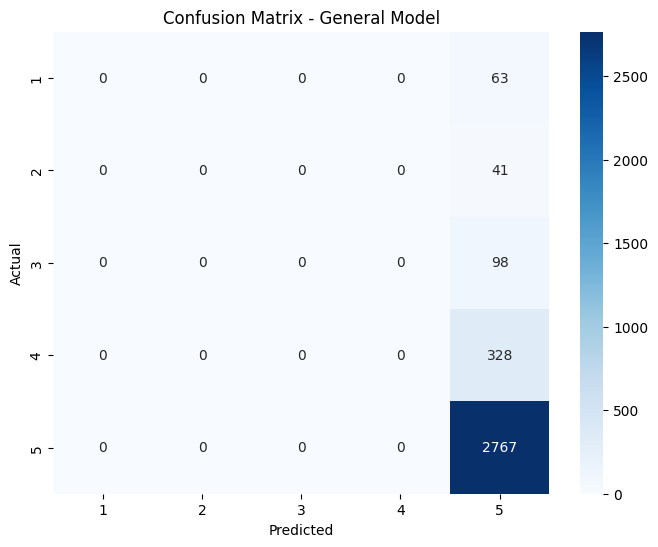

In [40]:
# Copy the DataFrame for the general LSTM model
df_general = df.copy()

# Filter valid data for the general LSTM model
df_general = df_general.dropna(subset=['comment_id', 'stars'])
df_general = df_general[df_general['stars'].between(1, 5)]

# Preprocess the text data
texts_general = df_general['comment_id'].astype(str)
labels_general = df_general['stars']

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(texts_general, labels_general, test_size=0.2, random_state=42)

# Tokenization and padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 150
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to 0-indexed
y_train = y_train - 1
y_test = y_test - 1

# Build and train the model (same structure as before)
num_classes = 5
model_general = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_general.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_general = model_general.fit(
    X_train_padded, y_train,
    epochs=10,
    validation_data=(X_test_padded, y_test),
    batch_size=32
)

loss, accuracy = model_general.evaluate(X_test_padded, y_test)
print(f"General Model Test Accuracy: {accuracy}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_general.history['accuracy'], label='Training Accuracy')
plt.plot(history_general.history['val_accuracy'], label='Validation Accuracy')
plt.title('General Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_general.history['loss'], label='Training Loss')
plt.plot(history_general.history['val_loss'], label='Validation Loss')
plt.title('General Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Classification report
y_pred = model_general.predict(X_test_padded)
y_pred_classes = y_pred.argmax(axis=-1)
print("General Model Classification Report")
print(classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(1, 6)]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(1, 6)], yticklabels=[str(i) for i in range(1, 6)])
plt.title('Confusion Matrix - General Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### LSTM for Specific Recipe

Epoch 1/10


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 380ms/step - accuracy: 0.2326 - loss: 1.6017 - val_accuracy: 0.9167 - val_loss: 1.5291
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8646 - loss: 1.5175 - val_accuracy: 0.9167 - val_loss: 1.3911
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8750 - loss: 1.3674 - val_accuracy: 0.9167 - val_loss: 1.1770
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8646 - loss: 1.1389 - val_accuracy: 0.9167 - val_loss: 0.9213
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8646 - loss: 0.8687 - val_accuracy: 0.9167 - val_loss: 0.7230
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8854 - loss: 0.6566 - val_accuracy: 0.9167 - val_loss: 0.6086
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8854 - loss: 0.5244 - val_accuracy: 0.9167 - val_loss: 0.5686
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8854 - loss: 0.5006 - val_accuracy: 0.9167 - val_loss: 0.5617
Epoch 9/10

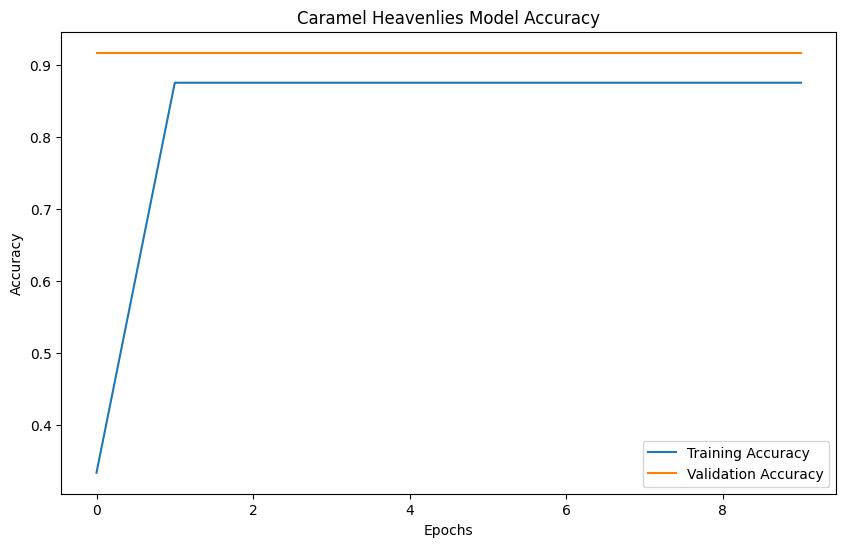

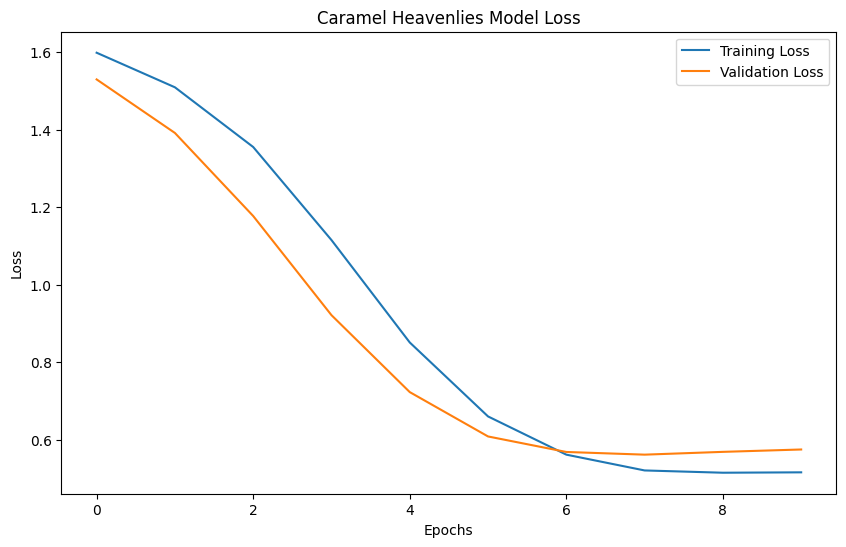

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Caramel Heavenlies Model Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.92      1.00      0.96        11

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

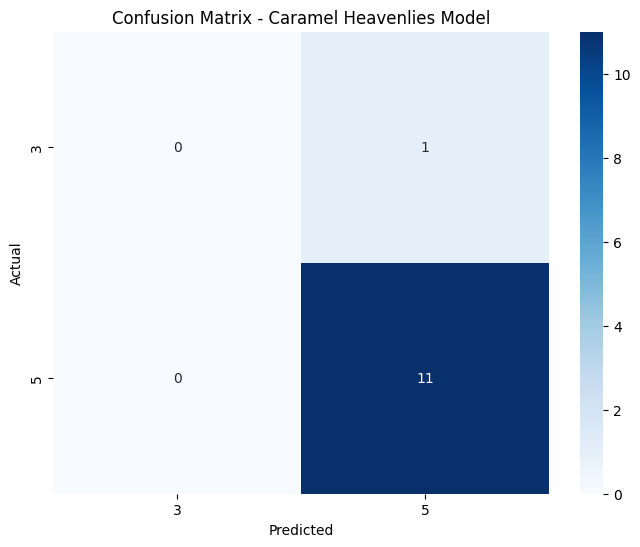

In [42]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the DataFrame for the specific recipe
df_specific = df.copy()

# Filter for the specific recipe
specific_recipe = "Caramel Heavenlies"
df_specific = df_specific.dropna(subset=['comment_id', 'stars', 'recipe_name'])
df_specific = df_specific[df_specific['stars'].between(1, 5)]
df_specific = df_specific[df_specific['recipe_name'] == specific_recipe]

# Check if there are enough reviews for the recipe
if df_specific.shape[0] < 1:
    raise ValueError(f"No reviews found for the recipe '{specific_recipe}'.")

# Preprocess the text and labels
texts_specific = df_specific['comment_id'].astype(str)
labels_specific = df_specific['stars']

# Handle small datasets
if df_specific.shape[0] < 2:
    print(f"Warning: Only {df_specific.shape[0]} review(s) found for '{specific_recipe}'.")
    X_train, X_test, y_train, y_test = texts_specific, texts_specific, labels_specific, labels_specific
else:
    X_train, X_test, y_train, y_test = train_test_split(texts_specific, labels_specific, test_size=0.2, random_state=42)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 150
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to 0-indexed
y_train = y_train - 1
y_test = y_test - 1

# Step 2: Build and Train the LSTM Model
num_classes = 5
model_specific = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_specific.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history_specific = model_specific.fit(
    X_train_padded, y_train,
    epochs=10,
    validation_data=(X_test_padded, y_test),
    batch_size=32
)

loss, accuracy = model_specific.evaluate(X_test_padded, y_test)
print(f"Specific Recipe Model Test Accuracy: {accuracy}")

# Step 3: Visualize Training and Validation Metrics
# Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_specific.history['accuracy'], label='Training Accuracy')
plt.plot(history_specific.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{specific_recipe} Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history_specific.history['loss'], label='Training Loss')
plt.plot(history_specific.history['val_loss'], label='Validation Loss')
plt.title(f'{specific_recipe} Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 4: Classification Report and Confusion Matrix
# Predict and generate predicted classes
y_pred = model_specific.predict(X_test_padded)
y_pred_classes = y_pred.argmax(axis=-1)

# Dynamically set target names based on unique classes
unique_classes = sorted(y_test.unique())
target_names = [str(label + 1) for label in unique_classes]  # Adjust to match star ratings

# Classification Report
print(f"{specific_recipe} Model Classification Report")
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix - {specific_recipe} Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# NLP

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Step 1: Filter missing or invalid rows
nlp_df = df.dropna(subset=['text', 'stars'])
nlp_df = nlp_df[nlp_df['stars'].between(0, 5)]  # Ensure stars range is 0-5

# Step 2: Preprocess text and labels
nlp_texts = nlp_df['text'].astype(str)
nlp_labels = nlp_df['stars']  # Keep stars as-is (0-5)

# Step 3: Split into train and test sets
nlp_X_train, nlp_X_test, nlp_y_train, nlp_y_test = train_test_split(
    nlp_texts, nlp_labels, test_size=0.2, random_state=42
)

# Step 4: Tokenize the text data
nlp_max_words = 10000  # Vocabulary size
nlp_max_len = 100      # Max length of padded sequences

nlp_tokenizer = Tokenizer(num_words=nlp_max_words, oov_token='<OOV>')
nlp_tokenizer.fit_on_texts(nlp_X_train)

nlp_X_train_seq = nlp_tokenizer.texts_to_sequences(nlp_X_train)
nlp_X_test_seq = nlp_tokenizer.texts_to_sequences(nlp_X_test)

nlp_X_train_padded = pad_sequences(nlp_X_train_seq, maxlen=nlp_max_len, padding='post', truncating='post')
nlp_X_test_padded = pad_sequences(nlp_X_test_seq, maxlen=nlp_max_len, padding='post', truncating='post')

# Step 5: Build the NLP model with Bidirectional LSTM
nlp_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=nlp_max_words, output_dim=64, input_length=nlp_max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  # 6 classes for stars (0-5)
])

nlp_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Step 6: Train the model
nlp_history = nlp_model.fit(
    nlp_X_train_padded, nlp_y_train,
    epochs=10,
    validation_data=(nlp_X_test_padded, nlp_y_test),
    batch_size=32
)

# Step 7: Evaluate the model
nlp_loss, nlp_accuracy = nlp_model.evaluate(nlp_X_test_padded, nlp_y_test)
print(f"Test Accuracy: {nlp_accuracy}")

# Step 8: Generate predictions
nlp_y_pred = nlp_model.predict(nlp_X_test_padded).argmax(axis=1)

# Check unique classes in nlp_y_test
nlp_unique_classes = np.unique(nlp_y_test)
print("Present classes:", nlp_unique_classes)

# Step 9: Confusion Matrix
nlp_cm = confusion_matrix(nlp_y_test, nlp_y_pred)
sns.heatmap(nlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=nlp_unique_classes, yticklabels=nlp_unique_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 10: Classification Report
print("Classification Report:")
print(classification_report(nlp_y_test, nlp_y_pred, target_names=[str(i) for i in nlp_unique_classes]))

### Bigrams and Trigrams by Star Rating

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import re

# Step 1: Ensure you have the necessary NLTK stopwords installed
import nltk
nltk.download('stopwords')

# Step 2: Define a custom stopword list
stop_words = set(stopwords.words('english'))
# Extend with custom stop words and common contractions
additional_stop_words = {'39', 've', 'don', 'll', 'didn', 'doesn', 'wasn', 'won', 'like', 'make', 'good', 'recipe', 'followed'}
stop_words.update(additional_stop_words)

# Step 3: Preprocessing function to clean text
def clean_text(text):
    """
    Cleans text by removing punctuation, lowercasing, and filtering stopwords.
    """
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    words = text.lower().split()
    return " ".join([word for word in words if word not in stop_words])

# Step 4: Clean the text data
df['cleaned_text'] = df['text'].astype(str).apply(clean_text)

# Step 5: Function for extracting bigrams and trigrams
def get_ngrams(corpus, ngram_range=(2, 3), top_n=20):
    """
    Extract top n bigrams and trigrams from the corpus.

    Args:
    - corpus (list of str): Text data
    - ngram_range (tuple): Range of ngrams to extract (e.g., (2, 3) for bigrams and trigrams)
    - top_n (int): Number of top ngrams to return

    Returns:
    - Counter: Counter object with top ngrams and their frequencies
    """
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    ngram_matrix = vectorizer.fit_transform(corpus)
    ngram_counts = ngram_matrix.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    ngram_counter = Counter(dict(zip(ngram_vocab, ngram_counts)))
    return ngram_counter.most_common(top_n)

# Step 6: Generate bigrams and trigrams for each star rating
for star in sorted(df['stars'].unique()):
    star_texts = df[df['stars'] == star]['cleaned_text']
    print(f"\nTop Bigrams and Trigrams for {star}-Star Ratings:")
    top_ngrams = get_ngrams(star_texts, ngram_range=(2, 3), top_n=10)
    for ngram, count in top_ngrams:
        print(f"{ngram}: {count}")

# Step 7 (Optional): Visualize ngrams for a specific star rating
def plot_ngrams(star_rating, ngram_range=(2, 3), top_n=10):
    """
    Plot the top ngrams for a specific star rating.

    Args:
    - star_rating (int): The star rating to filter on
    - ngram_range (tuple): Range of ngrams to extract
    - top_n (int): Number of top ngrams to visualize
    """
    star_texts = df[df['stars'] == star_rating]['cleaned_text']
    top_ngrams = get_ngrams(star_texts, ngram_range=ngram_range, top_n=top_n)
    
    # Prepare data for plotting
    ngrams, counts = zip(*top_ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Ngrams')
    plt.title(f'Top {top_n} Bigrams and Trigrams for {star_rating}-Star Ratings')
    plt.gca().invert_yaxis()
    plt.show()

# Example: Plot for 5-star ratings
plot_ngrams(star_rating=5, ngram_range=(2, 3), top_n=10)

# Time Series Model (forecasting star ratings)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

# Step 1: Parse 'created_at' column as datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Step 2: Aggregate data by time (daily mean of 'stars')
star_ratings_ts = df.groupby(pd.Grouper(key='created_at', freq='D'))['stars'].mean().reset_index()

# Fill missing dates with zero or interpolate missing values
star_ratings_ts['stars'] = star_ratings_ts['stars'].fillna(0)

# Step 3: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['stars'], label='Star Ratings (Time Series)')
plt.title('Time Series of Star Ratings')
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.legend()
plt.show()

# Step 4: Prepare data for Prophet
prophet_star_data = star_ratings_ts.rename(columns={'created_at': 'ds', 'stars': 'y'})

# Step 5: Fit Prophet Model
star_prophet_model = Prophet()
star_prophet_model.fit(prophet_star_data)

# Step 6: Make future predictions
star_future = star_prophet_model.make_future_dataframe(periods=30)  # Forecast next 30 days
star_forecast = star_prophet_model.predict(star_future)

# Step 7: Plot forecast
fig = star_prophet_model.plot(star_forecast)
plt.title("Star Ratings Forecast (Prophet)")
plt.show()

# Optional: Seasonal Decomposition with Prophet
fig2 = star_prophet_model.plot_components(star_forecast)
plt.show()

# Step 8: Use SARIMAX for time series modeling (optional)
sarima_model_star = SARIMAX(
    star_ratings_ts['stars'], 
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 12)
)
sarima_star_result = sarima_model_star.fit(disp=False)

# Add SARIMA forecast to the time series data
star_ratings_ts['sarima_forecast'] = sarima_star_result.predict(start=0, end=len(star_ratings_ts) - 1)

# Step 9: Plot SARIMA results
plt.figure(figsize=(12, 6))
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['stars'], label='Actual Star Ratings')
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['sarima_forecast'], label='SARIMA Forecast', linestyle='--')
plt.title('Star Ratings Forecasting (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.legend()
plt.show()

### Forecast for Specific Recipes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Filter dataset for a specific recipe
recipe_name_filter = "Creamy White Chili"
filtered_df = df[df['recipe_name'] == recipe_name_filter]

# Ensure the filtered DataFrame is not empty
if filtered_df.empty:
    raise ValueError(f"No data available for the recipe: {recipe_name_filter}")

# Inspect recent data trends
print(f"\nRecent Star Ratings for {recipe_name_filter}:")
print(filtered_df[['created_at', 'stars']].sort_values(by='created_at', ascending=False).head(10))

# Step 2: Parse 'created_at' column as datetime
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['created_at'])  # Drop rows with invalid dates

# Step 3: Aggregate data by date (e.g., daily mean of 'stars')
recipe_ts = (
    filtered_df.groupby(pd.Grouper(key='created_at', freq='D'))['stars']
    .mean()
    .reset_index()
)

# Ensure there are no missing dates and fill gaps
recipe_ts['stars'] = recipe_ts['stars'].interpolate().fillna(0)

# Step 4: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(recipe_ts['created_at'], recipe_ts['stars'], label=f'{recipe_name_filter} Star Ratings', color='blue')
plt.title(f'Time Series of Star Ratings for {recipe_name_filter}')
plt.xlabel('Date')
plt.ylabel('Star Rating')
plt.legend()
plt.show()

# Step 5: Prepare data for Prophet
prophet_data = recipe_ts.rename(columns={'created_at': 'ds', 'stars': 'y'})

# Step 6: Fit Prophet model
recipe_prophet_model = Prophet()
recipe_prophet_model.fit(prophet_data)

# Step 7: Make future predictions
future = recipe_prophet_model.make_future_dataframe(periods=30)
forecast = recipe_prophet_model.predict(future)

# Step 8: Rename the forecast columns for clarity (after Prophet operations)
forecast_renamed = forecast.rename(columns={
    'ds': 'Date',
    'yhat': 'Predicted Star Rating',
    'yhat_lower': 'Lower Confidence Bound',
    'yhat_upper': 'Upper Confidence Bound'
})

# Step 9: Plot the forecast with forecasted values highlighted
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Ratings', color='orange', linestyle='--')
plt.fill_between(
    forecast['ds'], 
    forecast['yhat_lower'], 
    forecast['yhat_upper'], 
    color='orange', 
    alpha=0.2, 
    label='Confidence Interval'
)
plt.axvline(x=prophet_data['ds'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.title(f"Star Ratings Forecast for {recipe_name_filter}")
plt.xlabel('Date')
plt.ylabel('Star Rating')
plt.legend()
plt.show()

# Step 10: Seasonal decomposition (keep 'ds' column for Prophet compatibility)
fig2 = recipe_prophet_model.plot_components(forecast)
plt.show()

# Step 11: Print forecasted ratings with clearer column names
clear_forecasted_ratings = forecast_renamed[['Date', 'Predicted Star Rating', 'Lower Confidence Bound', 'Upper Confidence Bound']].tail(30)
print("\nForecasted Ratings")
print(clear_forecasted_ratings.to_string(index=False))